# Assignment 3: Track 1 Dyna-Q Project Report

## Team: DynaQties
* Nikhil Kakodkar: 260578689 | nikhil.kakodkar@mail.mcgill.ca
* Karim Koreitem: 260460964 | karim.koreitem@mail.mcgill.ca

In [1]:
% matplotlib inline
from core import dyna_main
import matplotlib.pyplot as plt
from utils import utils
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

## Default Configuration Parameters

This function initializes our configuration parameters which are used by our dyna_main core experiment function. The main parameters to look at are:
* **arch:** The algorithm {dyna_q, dyna_q_plus}.
* **terminal_step:** The number of steps to run the algorithm.
* **switch_maze_at_step:** The step number at which the maze changes.
* **maze_type:** The maze type {blocking, shorcut}.
* **sim_epoch:** Number of simulation iterations
* **kappa:** Bonus reward parameter for dyna-Q+ algorithm

The **terminal_step** and the **switch_maze_at_step** values were arbitrarily chosen. **sim_epoch** and **kappa** were chosen based on empirical results presented later in this report.

In [2]:
def init_default_config():
    config = {'arch' : 'dyna_q',
              'terminal_step' : 6000,
              'switch_maze_at_step' : 3000,
              'maze_type' : 'blocking',
              'maze_params' : {
                  'row' : 6,
                  'col' : 9,
                  'start_row' : 6,
                  'start_col' : 4
              },
              'policy' : 'epsilon_greedy',
              'policy_params' : {
                  'epsilon' : 0.1,
                  'seed' : 24
              },
              'learning_alg' : 'q_learning',
              'learning_alg_params' : {
                  'alpha' : 0.1,
                  'gamma' : 0.95,
                  'seed' : 42
              },
              'model' : 'deterministic_no_prior',
              'model_params' : {
                  'sim_epoch' : 500
              },
              'planner_params' : {
                  'kappa' : 0.01
              }
             }
    return config

## I. Blocking Maze

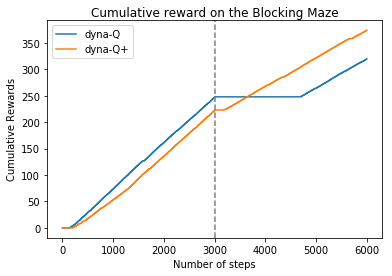

In [3]:
# Dyna-Q
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'blocking'
result_q = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_q = []
for step in range(len(result_q)):
    cum_reward += result_q[step]['experience']['R']
    cum_reward_lst_q.append(cum_reward)

# Dyna-Q+
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'blocking'
result_qplus = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_qplus = []
for step in range(len(result_qplus)):
    cum_reward += result_qplus[step]['experience']['R']
    cum_reward_lst_qplus.append(cum_reward)

# Plotting cummulative rewards for the two algorithms
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.title('Cumulative reward on the Blocking Maze')
plt.plot(cum_reward_lst_q, label='dyna-Q')
plt.plot(cum_reward_lst_qplus, label='dyna-Q+')
plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.legend()

This figure shows cumulative rewards attained by the two frameworks. The grey line indicates the time when the environment blocks the current path and open a new one. Though the Dyna-Q+ framework trails behind the Dyna-Q in the beginning, it is able to learn the switch in the environment quicker than Dyna-Q. We hypothesise that the initial lag is since Dyna-Q+ incentivizes visiting states which haven't been explored for a while even if it knows the current solution of the maze.

## II. Shortcut Maze

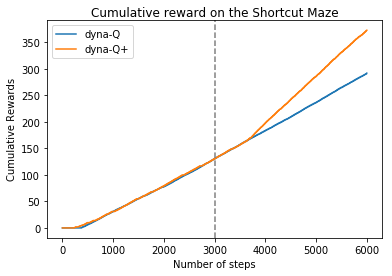

In [4]:
# Dyna-Q
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'shortcut'
result_q = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_q = []
for step in range(len(result_q)):
    cum_reward += result_q[step]['experience']['R']
    cum_reward_lst_q.append(cum_reward)

# Dyna-Q+
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'shortcut'
result_qplus = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_qplus = []
for step in range(len(result_qplus)):
    cum_reward += result_qplus[step]['experience']['R']
    cum_reward_lst_qplus.append(cum_reward)

# Plotting cummulative rewards for the two algorithms
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.title('Cumulative reward on the Shortcut Maze')
plt.plot(cum_reward_lst_q, label='dyna-Q')
plt.plot(cum_reward_lst_qplus, label='dyna-Q+')
plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.legend()

This figure shows cumulative rewards attained by the two frameworks in the Shortcut maze. Here we can see that Dyna-Q+ is able to discover the shortcut path to destination while Dyna-Q keeps exploiting the older path to destination. This figure is consistent with the results presented by Sutton et. al. [1].

## III. Dyna-Q: Experimenting over different sim-epoch (n) values

Here we experiment over various values of the simulation iterations n for both mazes.


### Blocking Maze

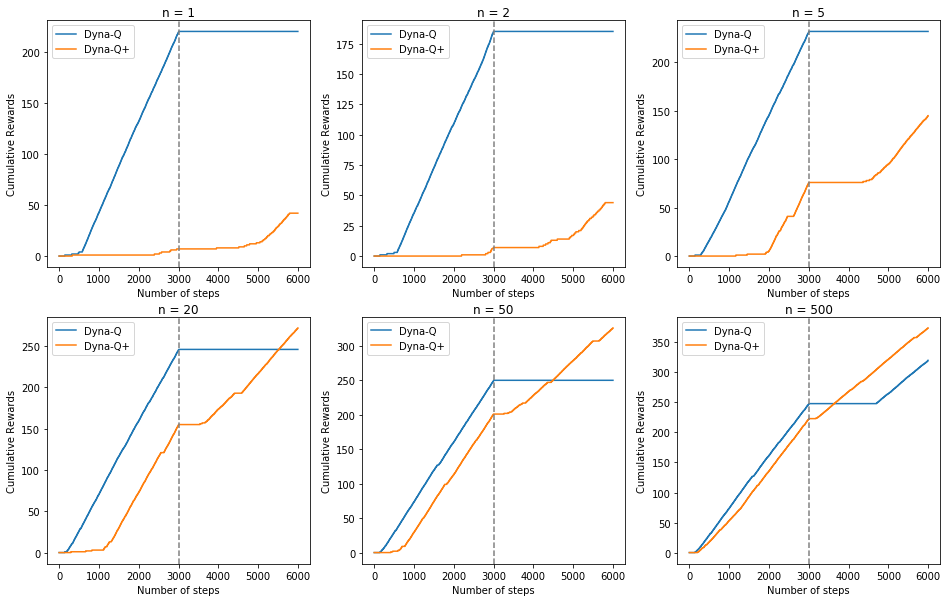

In [5]:
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'blocking'

fig = plt.figure(figsize=(16, 10))

for i, n in enumerate([1, 2, 5, 20, 50, 500]):    
    ax1 = fig.add_subplot(2, 3, i+1)    
    config['model_params']['sim_epoch'] = n
    
    config['arch'] = 'dyna_q'
    result_q = dyna_main.run_experiment(config)
    
    config['arch'] = 'dyna_q_plus'
    result_qplus = dyna_main.run_experiment(config)
    
    cum_reward = 0
    cum_reward_lst_q = []
    cum_reward_qplus = 0
    cum_reward_lst_qplus = []

    for step in range(len(result_q)):
        cum_reward += result_q[step]['experience']['R']
        cum_reward_lst_q.append(cum_reward)

    for step in range(len(result_qplus)):
        cum_reward_qplus += result_qplus[step]['experience']['R']
        cum_reward_lst_qplus.append(cum_reward_qplus)            
        
    ax1.plot(cum_reward_lst_q, label='Dyna-Q')
    ax1.plot(cum_reward_lst_qplus, label='Dyna-Q+')
    ax1.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
    ax1.set_ylabel('Cumulative Rewards')
    ax1.set_xlabel('Number of steps')
    ax1.set_title('n = ' + str(n))
    ax1.legend()
    

As expected for low values of **sim_epoch(n)** both frameworks take longer to solve the maze compared to larger value of **n**. But Dyna-Q+ consistently takes longer time to solve the maze before block. As mentioned before, this happens since Dyna-Q+ incentivizes states which have not been visited for a long time during planning phase. Though this makes Dyna-Q+ slower than Dyna-Q in solving the maze initially, it is consistently able to adapt to the change in the maze faster than Dyna-Q framework for all value of **n**.

### Shortcut Maze

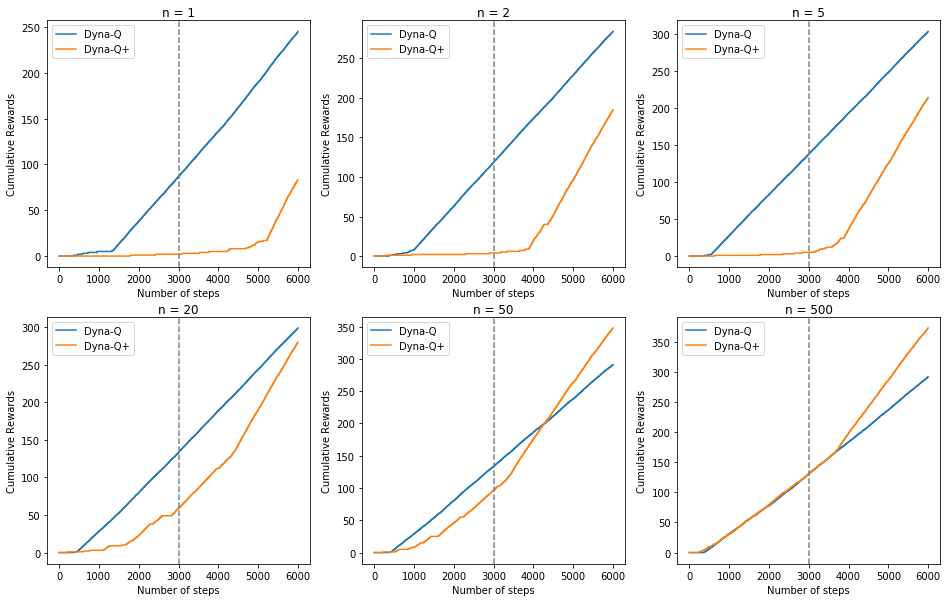

In [6]:
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'shortcut'

fig = plt.figure(figsize=(16, 10))

for i, n in enumerate([1, 2, 5, 20, 50, 500]):    
    ax1 = fig.add_subplot(2, 3, i+1)    
    config['model_params']['sim_epoch'] = n
    
    config['arch'] = 'dyna_q'
    result_q = dyna_main.run_experiment(config)
    
    config['arch'] = 'dyna_q_plus'
    result_qplus = dyna_main.run_experiment(config)
    
    cum_reward = 0
    cum_reward_lst_q = []
    cum_reward_qplus = 0
    cum_reward_lst_qplus = []

    for step in range(len(result_q)):
        cum_reward += result_q[step]['experience']['R']
        cum_reward_lst_q.append(cum_reward)

    for step in range(len(result_qplus)):
        cum_reward_qplus += result_qplus[step]['experience']['R']
        cum_reward_lst_qplus.append(cum_reward_qplus)            
        
    ax1.plot(cum_reward_lst_q, label='Dyna-Q')
    ax1.plot(cum_reward_lst_qplus, label='Dyna-Q+')
    ax1.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
    ax1.set_ylabel('Cumulative Rewards')
    ax1.set_xlabel('Number of steps')
    ax1.set_title('n = ' + str(n))
    ax1.legend()
    

Here too Dyna-Q+ consistently takes longer time to solve the maze before the shortcut path opens up. But it is still consistently able to adapt to the change in the maze and able to find the shorter path while Dyna-Q is completely unable to notice the change in the maze. This ability to adapt can be seen in the relative slopes of the two curves for Dyna-Q and Dyna-Q+.

## IV. Dyna-Q+: Experimenting over different kappa values

In order to better understand the effects of kappa, we ran Dyna-Q+ over a list of kappa values for both mazes. For our specific configuration, we find that kappa=0.01 provides us with the highest rate of increase of cumulative rewards for both mazes. It represents the best value for the trade-off between rewarding exploration and exploitation. Please note that when kappa = 0.0, the algorithm behaves more like Dyna-Q (with some differences in the initializations of the model and the Q function) as the reward is not modified. 

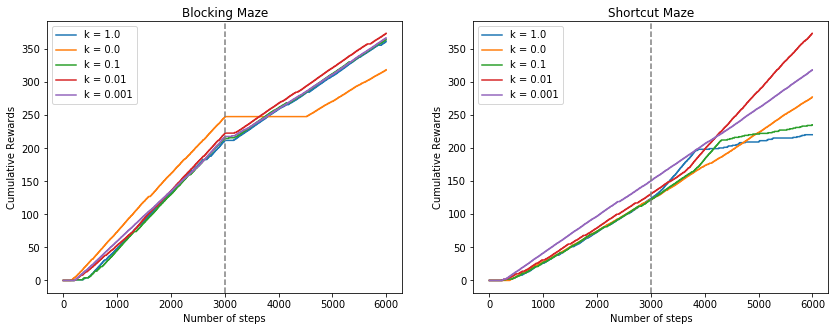

In [7]:
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'blocking'

for k in [1.0, 0.0, 0.1, 0.01, 0.001]:    
    config['planner_params']['kappa'] = k
    result_qplus = dyna_main.run_experiment(config)
    
    cum_reward = 0
    cum_reward_lst_qplus = []
    for step in range(len(result_qplus)):
        cum_reward += result_qplus[step]['experience']['R']
        cum_reward_lst_qplus.append(cum_reward)
    
    ax1.plot(cum_reward_lst_qplus, label='k = ' + str(k))
    
ax1.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_xlabel('Number of steps')
ax1.set_title('Blocking Maze')
ax1.legend()

config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'shortcut'

for k in [1.0, 0.0, 0.1, 0.01, 0.001]:    
    config['planner_params']['kappa'] = k
    result_qplus = dyna_main.run_experiment(config)
    
    cum_reward = 0
    cum_reward_lst_qplus = []
    for step in range(len(result_qplus)):
        cum_reward += result_qplus[step]['experience']['R']
        cum_reward_lst_qplus.append(cum_reward)
    
    ax2.plot(cum_reward_lst_qplus, label='k = ' + str(k))
    
ax2.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_xlabel('Number of steps')
ax2.set_title('Shortcut Maze')
ax2.legend()

## V. Visualizing the value function
**(NOTE: Not rendered in github. Please download the notebook to see the animations)**

To better visualize the value function's changes, we plot an animation of $max_{a}Q(s,a)$ in grid form for both mazes and both Dyna-Q and Dyna-Q+. The color map is blue to red with red being higher. 

### Blocking Maze

#### Dyna-Q

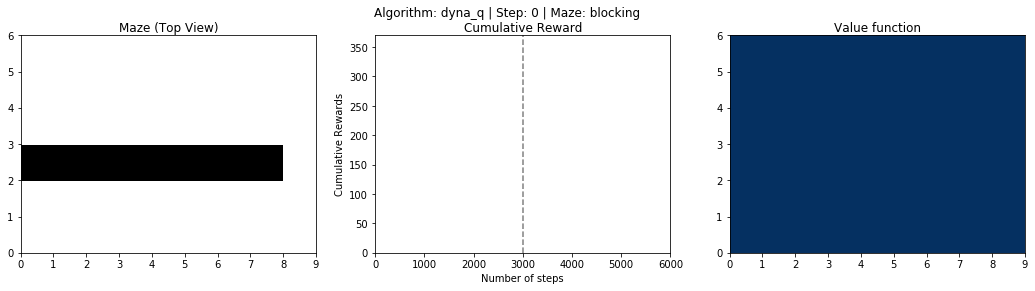

In [8]:
# Dyna-Q
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'blocking'
result_q = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_q = []

for step in range(len(result_q)):
    cum_reward += result_q[step]['experience']['R']
    cum_reward_lst_q.append(cum_reward)

# Plot the animations
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
axes = [ax1, ax2, ax3]
game_q_block = utils.GameAnimator(figure=fig, axes=axes, result=result_q)
anim_q_block = game_q_block.animate(start_step = 0, stop_step = 5999)

In [9]:
HTML(anim_q_block.to_html5_video())

#### Dyna-Q+

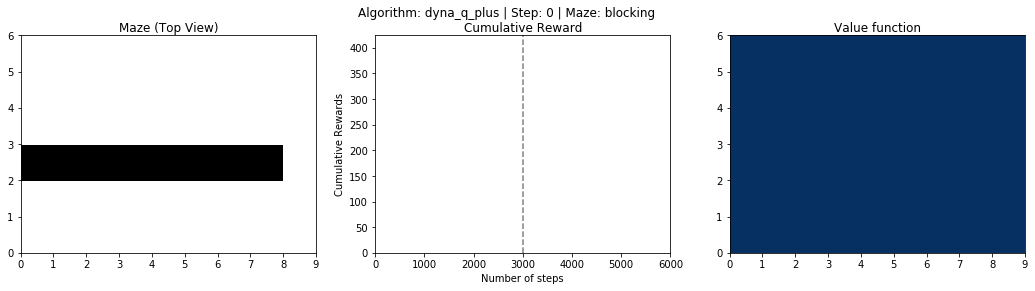

In [10]:
# Dyna-Q+
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'blocking'
result_qplus = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_qplus = []

for step in range(len(result_qplus)):
    cum_reward += result_qplus[step]['experience']['R']
    cum_reward_lst_qplus.append(cum_reward)
    
# Plot the animations
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
axes = [ax1, ax2, ax3]
game_qplus_block = utils.GameAnimator(figure=fig, axes=axes, result=result_qplus)
anim_qplus_block = game_qplus_block.animate(start_step = 0, stop_step = 5999)

In [11]:
HTML(anim_qplus_block.to_html5_video())

#### Discussion
In both cases, the visualization of the value function illustrates our experiments very well. The initial path is clear marked in red colors as the system starts to accumulate rewards. Once the maze changes at step 3000, Dyna-Q+ does a much better job at recovering quickly (~ step 3200) and locating the new path while Dyna-Q needs close to 2000 steps to do so (~ step 4750). The opening clearly shifts in the value function animation to showcase the new opening. 


### Shortcut Maze

#### Dyna-Q

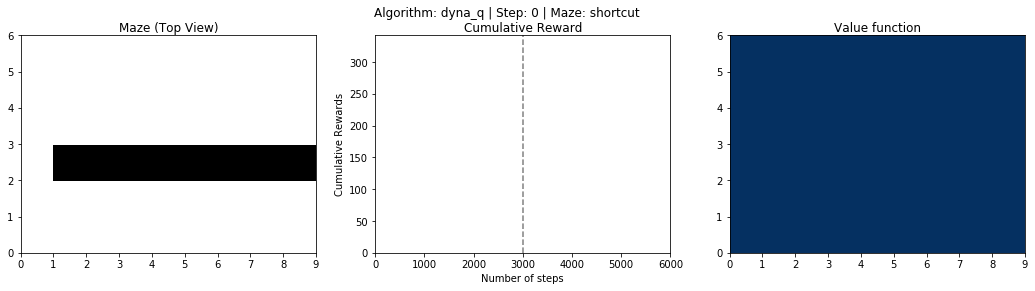

In [12]:
# Dyna-Q
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'shortcut'
result_q = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_q = []

for step in range(len(result_q)):
    cum_reward += result_q[step]['experience']['R']
    cum_reward_lst_q.append(cum_reward)

# Plot the animations
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
axes = [ax1, ax2, ax3]
game_q_short = utils.GameAnimator(figure=fig, axes=axes, result=result_q)
anim_q_short = game_q_short.animate(start_step = 0, stop_step = 5999)

In [13]:
HTML(anim_q_short.to_html5_video())

#### Dyna-Q+

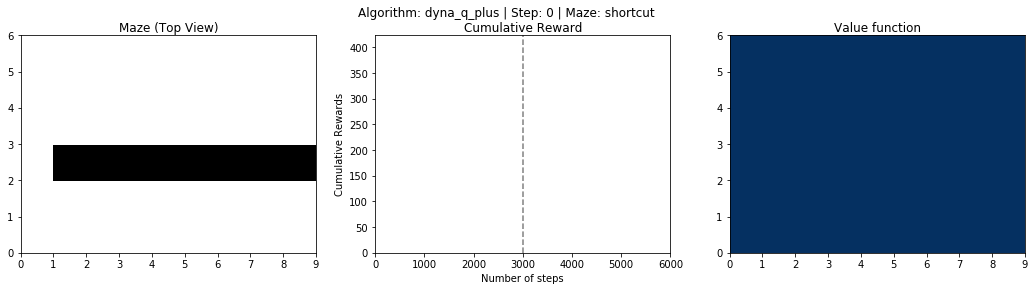

In [14]:
# Dyna-Q+
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'shortcut'
result_qplus = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_qplus = []

for step in range(len(result_qplus)):
    cum_reward += result_qplus[step]['experience']['R']
    cum_reward_lst_qplus.append(cum_reward)
    
# Plot the animations
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
axes = [ax1, ax2, ax3]
game_qplus_short = utils.GameAnimator(figure=fig, axes=axes, result=result_qplus)
anim_qplus_short = game_qplus_short.animate(start_step = 0, stop_step = 5999)

In [15]:
HTML(anim_qplus_short.to_html5_video())

#### Discussion
As with the blocking maze examples, the visualization of the value function is a nice way to understand the system's evolution. Once the maze changes at step 3000, Dyna-Q completely fails to discover the new path and continues to accumulate rewards at the same rate as before using the slower path. For Dyna-Q+, the system takes about 750 steps before it discovers the new faster path at around step 3750. The opening clearly shifts in the value function animation to showcase the new opening in Dyna-Q+ (on the right). 
